**DATA VISUALIZATION OF VOLCANIC ERUPTION (2010-2018)**

In [58]:
# importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium 
from folium import plugins
import seaborn as sns
from tabulate import tabulate as tbt 

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [2]:
# loading the file 
vol_df = pd.read_csv(r'D:\Documents\Programming\Datasets\volcano_data_2010.csv')
vol_df

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Time,VEI,Agent,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,5023,Stratovolcano,Historical,D1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,1666,Stratovolcano,Historical,D1,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,2552,Complex volcano,Historical,D1,1.0,T,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,538,Stratovolcano,Holocene,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,1784,Stratovolcano,Historical,D1,3.0,NaN,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0
5,2010,8,30.0,NaN,NaN,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,U,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010,10,26.0,NaN,NaN,Merapi,Java,Indonesia,-7.542,110.442,2947,Stratovolcano,Historical,D1,NaN,NaN,367.0,3.0,NaN,NaN,277.0,3.0,600.00,4.0,NaN,3.0,367.0,3.0,NaN,NaN,277.0,3.0,600.00,4.0,NaN,3.0
7,2010,11,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,5023,Stratovolcano,Historical,D1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
8,2010,12,28.0,NaN,NaN,Tengger Caldera,Java,Indonesia,-7.942,112.950,2329,Stratovolcano,Historical,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011,1,3.0,NaN,NaN,Merapi,Java,Indonesia,-7.542,110.442,2947,Stratovolcano,Historical,D1,NaN,M,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN


In [3]:
#Lets get a statistical summary of each column
vol_df.describe()

,Year,Month,Day,Latitude,Longitude,Elevation,VEI,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
count,63.000000,63.000000,57.000000,63.000000,63.000000,63.000000,19.000000,29.000000,29.000000,2.000000,2.0,18.000000,21.000000,4.00000,41.000000,7.000000,16.000000,29.000000,29.000000,2.000000,2.0,18.000000,21.000000,4.00000,39.000000,5.000000,14.000000
mean,2013.873016,6.111111,15.631579,6.630159,61.109476,2214.936508,2.473684,18.689655,1.103448,23.500000,1.0,134.611111,1.380952,179.55500,1.439024,619.714286,1.625000,18.689655,1.103448,23.500000,1.0,134.611111,1.380952,179.55500,1.461538,866.800000,1.714286
std,2.779487,3.668133,9.240114,22.210795,101.622157,1123.700882,0.904828,67.925434,0.409253,28.991378,0.0,463.091293,0.864650,283.58661,0.807737,1536.131908,0.957427,67.925434,0.409253,28.991378,0.0,463.091293,0.864650,283.58661,0.822261,1808.991902,0.994490
min,2010.000000,1.000000,1.000000,-41.326000,-155.292000,365.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,3.72000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,3.72000,1.000000,1.000000,1.000000
25%,2011.000000,3.000000,9.000000,-7.542000,-19.335000,1504.000000,2.000000,1.000000,1.000000,13.250000,1.0,3.000000,1.000000,11.80500,1.000000,1.500000,1.000000,1.000000,1.000000,13.250000,1.0,3.000000,1.000000,11.80500,1.000000,2.000000,1.000000
50%,2014.000000,6.000000,15.000000,3.170000,110.442000,2218.000000,3.000000,2.000000,1.000000,23.500000,1.0,6.500000,1.000000,57.25000,1.000000,3.000000,1.000000,2.000000,1.000000,23.500000,1.0,6.500000,1.000000,57.25000,1.000000,3.000000,1.000000
75%,2016.500000,9.000000,23.000000,18.066500,126.402500,2682.000000,3.000000,7.000000,1.000000,33.750000,1.0,11.000000,1.000000,225.00000,2.000000,116.500000,2.000000,7.000000,1.000000,33.750000,1.0,11.000000,1.000000,225.00000,2.000000,230.000000,2.000000
max,2018.000000,12.000000,31.000000,63.630000,176.500000,5672.000000,4.000000,367.000000,3.000000,44.000000,1.0,1972.000000,4.000000,600.00000,4.000000,4098.000000,4.000000,367.000000,3.000000,44.000000,1.0,1972.000000,4.000000,600.00000,4.000000,4098.000000,4.000000


In [4]:
vol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                63 non-null     int64  
 1   Month                               63 non-null     int64  
 2   Day                                 57 non-null     float64
 3   TSU                                 2 non-null      object 
 4   EQ                                  1 non-null      object 
 5   Name                                63 non-null     object 
 6   Location                            63 non-null     object 
 7   Country                             63 non-null     object 
 8   Latitude                            63 non-null     float64
 9   Longitude                           63 non-null     float64
 10  Elevation                           63 non-null     int64  
 11  Type                                63 non-null

Total 63 rows and 36 columns with data types of float64, int64 and obj. 

Our data has columns which contains mostly null values. So we need to remove those columns first as they won't be required for analysis. 

In [5]:
# Lets remove columns having more than 20 NaN values
vol_df.dropna(thresh = 20, axis= 1, inplace= True)
vol_df.info()

# Now Lets remove similar and uneccessary columns
vol_df.drop(columns=['Month','Day', 'Elevation','DEATHS_DESCRIPTION', 'TOTAL_DEATHS_DESCRIPTION','TOTAL_DEATHS','TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_INJURIES_DESCRIPTION', 'Agent','Time', 'Status','DAMAGE_DESCRIPTION' ], inplace= True )

# Setting Year column as index
#vol_df.set_index('Year', inplace= True)

vol_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        63 non-null     int64  
 1   Month                       63 non-null     int64  
 2   Day                         57 non-null     float64
 3   Name                        63 non-null     object 
 4   Location                    63 non-null     object 
 5   Country                     63 non-null     object 
 6   Latitude                    63 non-null     float64
 7   Longitude                   63 non-null     float64
 8   Elevation                   63 non-null     int64  
 9   Type                        63 non-null     object 
 10  Status                      63 non-null     object 
 11  Time                        63 non-null     object 
 12  Agent                       23 non-null     object 
 13  DEATHS                      29 non-nu

,Year,Name,Location,Country,Latitude,Longitude,Type,DEATHS,INJURIES_DESCRIPTION
0,2010,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,Stratovolcano,NaN,NaN
1,2010,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,Stratovolcano,2.0,NaN
2,2010,Pacaya,Guatemala,Guatemala,14.381,-90.601,Complex volcano,1.0,NaN
3,2010,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,Stratovolcano,NaN,NaN
4,2010,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,Stratovolcano,4.0,1.0
5,2010,Sinabung,Sumatra,Indonesia,3.170,98.392,Stratovolcano,2.0,NaN
6,2010,Merapi,Java,Indonesia,-7.542,110.442,Stratovolcano,367.0,3.0
7,2010,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,Stratovolcano,NaN,NaN
8,2010,Tengger Caldera,Java,Indonesia,-7.942,112.950,Stratovolcano,NaN,NaN
9,2011,Merapi,Java,Indonesia,-7.542,110.442,Stratovolcano,1.0,1.0


In [6]:
# For now we don't need lat, long, deaths, injuries columns.
vol_df2 = vol_df.drop(columns=['Latitude', 'Longitude', 'DEATHS', 'INJURIES_DESCRIPTION'])
vol_df2

,Year,Name,Location,Country,Type
0,2010,Tungurahua,Ecuador,Ecuador,Stratovolcano
1,2010,Eyjafjallajokull,Iceland-S,Iceland,Stratovolcano
2,2010,Pacaya,Guatemala,Guatemala,Complex volcano
3,2010,Sarigan,Mariana Is-C Pacific,United States,Stratovolcano
4,2010,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,Stratovolcano
5,2010,Sinabung,Sumatra,Indonesia,Stratovolcano
6,2010,Merapi,Java,Indonesia,Stratovolcano
7,2010,Tungurahua,Ecuador,Ecuador,Stratovolcano
8,2010,Tengger Caldera,Java,Indonesia,Stratovolcano
9,2011,Merapi,Java,Indonesia,Stratovolcano


**VOLCANO TYPE WISE ERUPTION OVER THE YEARS**

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Type,,,,,,,,,
Caldera,0,0,0,0,0,0,2,1,0
Complex volcano,1,0,0,0,1,0,0,1,0
Lava dome,0,0,0,1,0,1,0,0,0
Shield volcano,0,1,3,0,1,0,0,1,3
Stratovolcano,8,8,0,7,4,5,3,5,5
Subglacial volcano,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Type'>

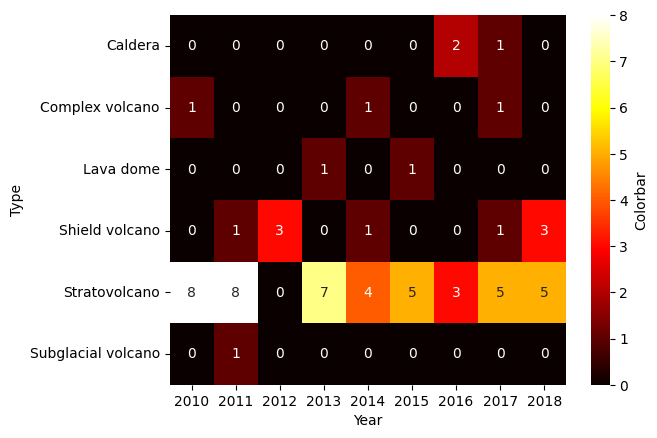

In [7]:
# Pivot_Table
display(vol_df2.pivot_table(values= 'Location', index='Type', columns= 'Year', aggfunc= 'count', fill_value= 0))

# Heatmap
sns.heatmap((vol_df2.pivot_table(values= 'Location', index='Type', columns= 'Year', aggfunc= 'count', fill_value= 0)), 
            cmap= 'hot', annot= True,
            cbar_kws= {'location': 'right', 'label': 'Colorbar'}
            )

Total Number of Eruptions From Each Volcano Type

In [91]:
# Storing the series in a temporary dataframe
temp_df = vol_df2.groupby('Type')['Name'].agg('count').to_frame()


# Renaming column name and reseting index
temp_df.rename(columns={'Name': 'Total Number of Eruptions'}, inplace= True)
temp_df.reset_index(inplace= True)

# Printing the table
print(tbt(temp_df, headers= temp_df.columns.to_list(), tablefmt= 'grid', showindex= False))

+--------------------+-----------------------------+
| Type               |   Total Number of Eruptions |
+====================+=============================+
| Caldera            |                           3 |
+--------------------+-----------------------------+
| Complex volcano    |                           3 |
+--------------------+-----------------------------+
| Lava dome          |                           2 |
+--------------------+-----------------------------+
| Shield volcano     |                           9 |
+--------------------+-----------------------------+
| Stratovolcano      |                          45 |
+--------------------+-----------------------------+
| Subglacial volcano |                           1 |
+--------------------+-----------------------------+


Text(0.5, 0, 'Total Number of Eruptions')

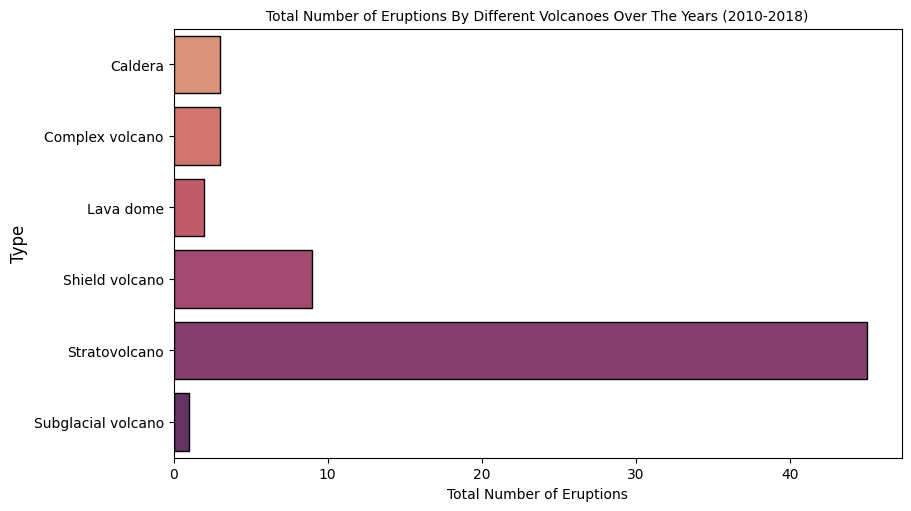

In [132]:
fig, ax =  plt.subplots(figsize= (9,5), constrained_layout = True)
sns.barplot( data= temp_df, 
            x= temp_df['Total Number of Eruptions'],
            y= temp_df['Type'],
            orient= 'h', 
            palette= 'flare',
            edgecolor= 'black', ax= ax
            )

ax.set_title ('Total Number of Eruptions By Different Volcanoes Over The Years (2010-2018)', fontsize= 'medium')

ax.set_ylabel(ylabel= 'Type', fontsize= 'large')
ax.set_xlabel(xlabel= 'Total Number of Eruptions', fontsize= 'medium')


Startovolcano had most eruptions, follwed by Shield volcano

In [9]:
vol_df2.groupby(['Type', 'Year'])['Year'].apply('count').sort_values(ascending =False)

Type                Year
Stratovolcano       2011    8
                    2010    8
                    2013    7
                    2018    5
                    2017    5
                    2015    5
                    2014    4
Shield volcano      2018    3
Stratovolcano       2016    3
Shield volcano      2012    3
Caldera             2016    2
Shield volcano      2017    1
Caldera             2017    1
Shield volcano      2014    1
                    2011    1
Lava dome           2015    1
                    2013    1
Complex volcano     2017    1
                    2014    1
                    2010    1
Subglacial volcano  2011    1
Name: Year, dtype: int64

Most Number of Eruptions By Each Volcano Type

Over the years, Stratovolcano saw most number of eruptions during the year of 2010, 2011 then 2013 and so on. 

**COUNTRY WISE VOLCANO ERUPTION**

In [10]:
# Creating a table with Country and Year wise eruption data
vol_df2.pivot_table(values= 'Location', index='Country', columns= 'Year', aggfunc= 'value_counts', fill_value= 0)

Year                                   2010  2011  2012  2013  2014  2015  \
Country          Location                                                   
Cape Verde       Cape Verde Is            0     0     0     0     1     0   
Chile            Chile-C                  0     1     0     0     0     0   
                 Chile-S                  0     0     0     0     0     1   
Ecuador          Ecuador                  2     1     0     0     0     0   
Eritrea          Africa-NE                0     1     0     0     0     0   
Guatemala        Guatemala                1     0     0     0     0     0   
Iceland          Iceland-S                1     1     0     0     0     0   
Indonesia        Halmahera-Indonesia      0     1     0     0     1     0   
                 Java                     2     1     0     1     1     0   
                 Lesser Sunda Is          0     0     0     2     0     0   
                 Sangihe Is-Indonesia     1     1     0     0     0     1   
                 Sulawesi-Indonesia       0     1     0     0     0     0   
                 Sumatra                  1     0     0     1     1     2   
Italy            Italy                    0     0     0     0     0     0   
Japan            Honshu-Japan             0     0     0     0     1     0   
                 Kyushu-Japan             0     1     0     1     0     0   
New Zealand      New Zealand              0     0     0     1     0     1   
Papua New Guinea New Guinea-NE of         0     0     0     0     0     1   
Peru             Peru                     0     0     0     1     0     0   
Philippines      Luzon-Philippines        0     1     0     1     0     0   
Russia           Kamchatka                0     0     1     0     0     0   
United States    Hawaiian Is              0     0     2     0     1     0   
                 Mariana Is-C Pacific     1     0     0     0     0     0   
                 US-Wyoming               0     0     0     0     0     0   
Vanuatu          Vanuatu-SW Pacific       0     0     0     0     0     0   

Year                                   2016  2017  2018  
Country          Location                                
Cape Verde       Cape Verde Is            0     0     0  
Chile            Chile-C                  0     0     0  
                 Chile-S                  0     0     0  
Ecuador          Ecuador                  0     0     0  
Eritrea          Africa-NE                0     0     0  
Guatemala        Guatemala                0     1     0  
Iceland          Iceland-S                0     0     0  
Indonesia        Halmahera-Indonesia      0     0     0  
                 Java                     0     2     1  
                 Lesser Sunda Is          1     0     0  
                 Sangihe Is-Indonesia     0     0     0  
                 Sulawesi-Indonesia       0     0     0  
                 Sumatra                  2     2     0  
Italy            Italy                    0     2     0  
Japan            Honshu-Japan             0     0     1  
                 Kyushu-Japan             1     0     0  
New Zealand      New Zealand              0     0     0  
Papua New Guinea New Guinea-NE of         0     0     2  
Peru             Peru                     0     0     0  
Philippines      Luzon-Philippines        0     0     1  
Russia           Kamchatka                0     0     0  
United States    Hawaiian Is              0     0     2  
                 Mariana Is-C Pacific     0     0     0  
                 US-Wyoming               1     0     0  
Vanuatu          Vanuatu-SW Pacific       0     1     1

Country with most number of eruption

In [11]:
# Storing the series in a temporary dataframe
temp_df = vol_df2.groupby('Country')['Type'].apply('count').to_frame()

# Renaming column name and reseting index
temp_df.rename(columns={'Type': 'Total Number of Eruptions'}, inplace= True)
temp_df.reset_index(inplace= True)

# Printing the table
print(tbt(temp_df, headers= temp_df.columns.to_list(), tablefmt= 'grid', showindex= False))

+------------------+-----------------------------+
| Country          |   Total Number of Eruptions |
+==================+=============================+
| Cape Verde       |                           1 |
+------------------+-----------------------------+
| Chile            |                           2 |
+------------------+-----------------------------+
| Ecuador          |                           3 |
+------------------+-----------------------------+
| Eritrea          |                           1 |
+------------------+-----------------------------+
| Guatemala        |                           2 |
+------------------+-----------------------------+
| Iceland          |                           2 |
+------------------+-----------------------------+
| Indonesia        |                          26 |
+------------------+-----------------------------+
| Italy            |                           2 |
+------------------+-----------------------------+
| Japan            |           

Thus, Indonesia has highest number of eruptions follwed by United States. 

<Axes: xlabel='Year', ylabel='Country'>

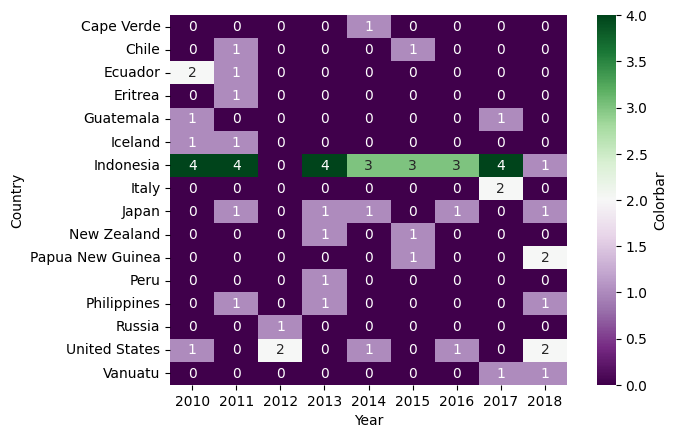

In [12]:
# Heatmap
sns.heatmap((vol_df2.pivot_table(values= 'Location', index='Country', columns= 'Year', aggfunc= 'count', fill_value= 0)),
            cmap= 'PRGn',annot= True, 
            cbar_kws={ 'label': 'Colorbar', 'anchor': (0.1, 0.5)})

**COUNTRY WISE DIFFREENT TYPE OF VOLCANOES AND NUMBER OF ERUPTIONS BY THEM OVER THE TIME PERIOD.**


In [13]:
vol_df2.pivot_table( values= 'Location', index= ['Country', 'Year'], columns='Type', aggfunc= {'Location': 'count'}, fill_value=0)

Type                   Caldera  Complex volcano  Lava dome  Shield volcano  \
Country          Year                                                        
Cape Verde       2014        0                0          0               0   
Chile            2011        0                0          0               0   
                 2015        0                0          0               0   
Ecuador          2010        0                0          0               0   
                 2011        0                0          0               0   
Eritrea          2011        0                0          0               0   
Guatemala        2010        0                1          0               0   
                 2017        0                0          0               0   
Iceland          2010        0                0          0               0   
                 2011        0                0          0               0   
Indonesia        2010        0                0          0               0   
                 2011        0                0          0               0   
                 2013        0                0          0               0   
                 2014        0                0          0               0   
                 2015        0                0          0               0   
                 2016        0                0          0               0   
                 2017        0                1          0               0   
                 2018        0                0          0               0   
Italy            2017        1                0          0               0   
Japan            2011        0                0          0               1   
                 2013        0                0          0               0   
                 2014        0                1          0               0   
                 2016        1                0          0               0   
                 2018        0                0          0               0   
New Zealand      2013        0                0          1               0   
                 2015        0                0          1               0   
Papua New Guinea 2015        0                0          0               0   
                 2018        0                0          0               0   
Peru             2013        0                0          0               0   
Philippines      2011        0                0          0               0   
                 2013        0                0          0               0   
                 2018        0                0          0               0   
Russia           2012        0                0          0               1   
United States    2010        0                0          0               0   
                 2012        0                0          0               2   
                 2014        0                0          0               1   
                 2016        1                0          0               0   
                 2018        0                0          0               2   
Vanuatu          2017        0                0          0               1   
                 2018        0                0          0               1   

Type                   Stratovolcano  Subglacial volcano  
Country          Year                                     
Cape Verde       2014              1                   0  
Chile            2011              1                   0  
                 2015              1                   0  
Ecuador          2010              2                   0  
                 2011              1                   0  
Eritrea          2011              1                   0  
Guatemala        2010              0                   0  
                 2017              1                   0  
Iceland          2010              1                   0  
                 2011              0                   1  
Indonesia      

In [14]:
vol_df2.groupby(['Country','Type'])['Type'].apply('count')

Country           Type              
Cape Verde        Stratovolcano          1
Chile             Stratovolcano          2
Ecuador           Stratovolcano          3
Eritrea           Stratovolcano          1
Guatemala         Complex volcano        1
                  Stratovolcano          1
Iceland           Stratovolcano          1
                  Subglacial volcano     1
Indonesia         Complex volcano        1
                  Stratovolcano         25
Italy             Caldera                1
                  Stratovolcano          1
Japan             Caldera                1
                  Complex volcano        1
                  Shield volcano         1
                  Stratovolcano          2
New Zealand       Lava dome              2
Papua New Guinea  Stratovolcano          3
Peru              Stratovolcano          1
Philippines       Stratovolcano          3
Russia            Shield volcano         1
United States     Caldera                1
                 

Indonesia saw highest number of eruptions from Stratovolcanoes, then United States saw highest number of eruptions from Shield Volcanoes. Philippines saw next highest number from Stratovolcano type. 

**YEAR WISE VOLCANIC ERUPTION**

In [15]:
vol_df2.groupby(['Year', 'Type', 'Country'])['Name'].apply('count')

Year  Type                Country         
2010  Complex volcano     Guatemala           1
      Stratovolcano       Ecuador             2
                          Iceland             1
                          Indonesia           4
                          United States       1
2011  Shield volcano      Japan               1
      Stratovolcano       Chile               1
                          Ecuador             1
                          Eritrea             1
                          Indonesia           4
                          Philippines         1
      Subglacial volcano  Iceland             1
2012  Shield volcano      Russia              1
                          United States       2
2013  Lava dome           New Zealand         1
      Stratovolcano       Indonesia           4
                          Japan               1
                          Peru                1
                          Philippines         1
2014  Complex volcano     Japan              

Year Which Saw Most Eruptions: 

In [16]:
temp_df = vol_df2.groupby('Year')['Country'].agg('count').to_frame()

# Renaming column name and reseting index
temp_df.rename(columns={'Country': 'Total Number of Eruptions'}, inplace= True)
temp_df.reset_index(inplace= True)

# Printing the table
print(tbt(temp_df, headers= temp_df.columns.to_list(), tablefmt= 'grid', showindex= False))


+--------+-----------------------------+
|   Year |   Total Number of Eruptions |
+========+=============================+
|   2010 |                           9 |
+--------+-----------------------------+
|   2011 |                          10 |
+--------+-----------------------------+
|   2012 |                           3 |
+--------+-----------------------------+
|   2013 |                           8 |
+--------+-----------------------------+
|   2014 |                           6 |
+--------+-----------------------------+
|   2015 |                           6 |
+--------+-----------------------------+
|   2016 |                           5 |
+--------+-----------------------------+
|   2017 |                           8 |
+--------+-----------------------------+
|   2018 |                           8 |
+--------+-----------------------------+


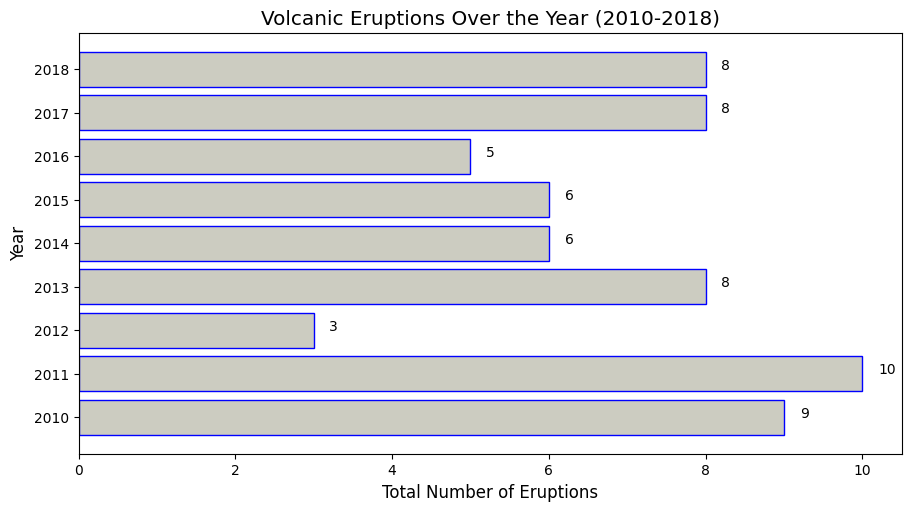

In [90]:
fig, ax = plt.subplots(figsize= (9,5), constrained_layout= True)

ax.barh(temp_df['Year'], temp_df['Total Number of Eruptions'], 
        tick_label = temp_df['Year'],
        color=(0.5, 0.5, 0.4, 0.4),  edgecolor='blue'
        )

# Setting Plot label
ax.set_title('Volcanic Eruptions Over the Year (2010-2018)', fontsize= 'x-large')

# Setting X,Y-axis labels
ax.set_xlabel('Total Number of Eruptions', fontsize= 'large')
ax.set_ylabel('Year', fontsize= 'large')

# Ploting Annotations on the bars
for index, value in enumerate(temp_df['Total Number of Eruptions']):
    plt.annotate(value, xy=(value + 0.2, temp_df.loc[index, 'Year']))

Year 2011 saw most number of eruptions followed by year 2010. 

**VOLCANIC ERUPTION DATA TABLE**

In [17]:
vol_df2.pivot_table( values= 'Location', index= ['Type','Country'], columns= 'Year', aggfunc= 'value_counts', fill_value= 0)

Year                                                      2010  2011  2012  \
Type               Country          Location                                 
Caldera            Italy            Italy                    0     0     0   
                   Japan            Kyushu-Japan             0     0     0   
                   United States    US-Wyoming               0     0     0   
Complex volcano    Guatemala        Guatemala                1     0     0   
                   Indonesia        Java                     0     0     0   
                   Japan            Honshu-Japan             0     0     0   
Lava dome          New Zealand      New Zealand              0     0     0   
Shield volcano     Japan            Kyushu-Japan             0     1     0   
                   Russia           Kamchatka                0     0     1   
                   United States    Hawaiian Is              0     0     2   
                   Vanuatu          Vanuatu-SW Pacific       0     0     0   
Stratovolcano      Cape Verde       Cape Verde Is            0     0     0   
                   Chile            Chile-C                  0     1     0   
                                    Chile-S                  0     0     0   
                   Ecuador          Ecuador                  2     1     0   
                   Eritrea          Africa-NE                0     1     0   
                   Guatemala        Guatemala                0     0     0   
                   Iceland          Iceland-S                1     0     0   
                   Indonesia        Halmahera-Indonesia      0     1     0   
                                    Java                     2     1     0   
                                    Lesser Sunda Is          0     0     0   
                                    Sangihe Is-Indonesia     1     1     0   
                                    Sulawesi-Indonesia       0     1     0   
                                    Sumatra                  1     0     0   
                   Italy            Italy                    0     0     0   
                   Japan            Honshu-Japan             0     0     0   
                                    Kyushu-Japan             0     0     0   
                   Papua New Guinea New Guinea-NE of         0     0     0   
                   Peru             Peru                     0     0     0   
                   Philippines      Luzon-Philippines        0     1     0   
                   United States    Mariana Is-C Pacific     1     0     0   
Subglacial volcano Iceland          Iceland-S                0     1     0   

Year                                                      2013  2014  2015  \
Type               Country          Location                                 
Caldera            Italy            Italy                    0     0     0   
                   Japan            Kyushu-Japan             0     0     0   
                   United States    US-Wyoming               0     0     0   
Complex volcano    Guatemala        Guatemala                0     0     0   
                   Indonesia        Java                     0     0     0   
                   Japan            Honshu-Japan             0     1     0   
Lava dome          New Zealand      New Zealand              1     0     1   
Shield volcano     Japan            Kyushu-Japan             0     0     0   
                   Russia           Kamchatka                0     0     0   
                   United States    Hawaiian Is              0     1     0   
                   Vanuatu          Vanuatu-SW Pacific       0     0     0   
Stratovolcano      Cape Verde       Cape Verde Is            0     1     0   
                   Chile            Chile-C                  0     0     0   
                                    Chile-S                  0     0     1   
                   Ecuador          Ecuador                  0     0     0   
                   Er

**INTERACTIVE MAPS OF VOLCANIC ERUPTIONS**

In [18]:
loc_df = vol_df[['Year','Name','Location','Country','Latitude','Longitude','Type']]
loc_df.head(7)

,Year,Name,Location,Country,Latitude,Longitude,Type
0,2010,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,Stratovolcano
1,2010,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,Stratovolcano
2,2010,Pacaya,Guatemala,Guatemala,14.381,-90.601,Complex volcano
3,2010,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,Stratovolcano
4,2010,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,Stratovolcano
5,2010,Sinabung,Sumatra,Indonesia,3.170,98.392,Stratovolcano
6,2010,Merapi,Java,Indonesia,-7.542,110.442,Stratovolcano


In [19]:
# Creating a Map object
loc_map = folium.Map( location= [-8.058, 114.242],
                     tiles= 'Stamen Terrain',
                     zoom_start= 2.4,
                     min_zoom=2,
                     control_scale= True
                     )

# Defining Color for Volcano types
def colour( volc_type ):
    if volc_type == 'Stratovolcano':
        return colour_list[0]
    elif volc_type == "Complex volcano":
        return colour_list[1]
    elif volc_type == "Shield volcano":
        return colour_list[2]
    elif volc_type == "Lava dome":
        return colour_list[3]
    elif volc_type == 'Subglacial volcano':
        return colour_list[4]
    else: return colour_list[5]

# Creating Marker Objcet and adding it to the Map object
for index_, (lat,lon) in enumerate(zip(loc_df.Latitude, loc_df.Longitude)):
    
    # Getting Volcano type
    volc_type = loc_df['Type'].iloc[ index_ ]
    # Color list
    colour_list = ['darkpurple', 'orange', 'darkgreen', 'darkred', 'blue', 'cadetblue']
    
    folium.Marker( location= [lat, lon],
                  popup= folium.Popup ( 'Volcano Type:' +' '+ str(loc_df['Type'].iloc[index_]) + ',' + 'Year:' + ' ' + str(loc_df['Year'].iloc[index_]) + ','
                                       + 'Name:' + ' ' + str(loc_df['Name'].iloc[index_]) + ',' + 'Location:' + ' ' + str(loc_df['Location'].iloc[index_]) + ',' +
                                       'Country:' + ' ' + str(loc_df['Country'].iloc[index_]), max_width= '200%'),
                  icon= folium.Icon(icon= 'glyphicon-warning-sign',
                                    color= colour(volc_type))
                  ).add_to(loc_map)

# Adding layer control
folium.LayerControl().add_to(loc_map)

loc_map

**HEATMAP OF VOLCANIC ERUPTIONS**

In [20]:
heat_map = folium.Map(   location= [-2.4263, 34.8047],
                        tiles= 'Cartodb dark_matter',
                        zoom_start= 2,
                        min_zoom= 2 
                    )

# Another Way to create a LIST of LIST of Lat,Lon as data parameter takes list 
pos = []

# Appenidng to the list
for i in zip(loc_df.Latitude, loc_df.Longitude):
    pos.append(list(i))
    
# Creating a Heatmap Object layer
plugins.HeatMap( data= pos,    
                     name= 'Heatmap of Volcanic Eruptions',
                     radius= 30,
                     gradient = {0.5: 'blue', 0.65: 'lime', 1: 'red'}
                     ).add_to(heat_map)

# Adding layer control
folium.LayerControl().add_to(heat_map)

heat_map